# Logistic Regression Practice Exercise
## Chemotherapy for Stage B/C colon cancer
Description
These are data from one of the first successful trials of adjuvant chemotherapy for colon cancer. Levamisole is a low-toxicity compound previously used to treat worm infestations in animals; 5-FU is a moderately toxic (as these things go) chemotherapy agent. There are two records per person, one for recurrence and one for death

**Attribute Information**
- id:	id
- study:	1 for all patients
- sex:	1=male
- age:	in years
- obstruct:	obstruction of colon by tumour
- perfor:	perforation of colon
- adhere:	adherence to nearby organs
- nodes:	number of lymph nodes with detectable cancer
- time:	days until event or censoring
- status:	censoring status
- differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)
- extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
- surg:	time from surgery to registration (0=short, 1=long)
- node4:	more than 4 positive lymph nodes
- etype:	event type: 1=recurrence,2=death

**Loading Libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

**Question 1: Import the Dataset**

In [2]:
df=pd.read_csv('colon.csv').drop('Unnamed: 0',axis=1)

**Question 2: Get the Dimensionality of the Dataset.**

In [3]:
df.shape

(1858, 15)

**Question 3: How many Missing Values are there? Drop all missing values.**

In [4]:
df.isnull().sum()
df=df.dropna()

**Question 4: Generate the five point summary of the data set.**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1776.0,466.506757,269.321338,1.0,234.75,466.5,700.25,929.0
study,1776.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
sex,1776.0,0.518018,0.499816,0.0,0.00,1.0,1.00,1.0
age,1776.0,59.810811,11.911137,18.0,53.00,61.0,69.00,85.0
obstruct,1776.0,0.192568,0.394427,0.0,0.00,0.0,0.00,1.0
perfor,1776.0,0.030405,0.171748,0.0,0.00,0.0,0.00,1.0
adhere,1776.0,0.144144,0.351335,0.0,0.00,0.0,0.00,1.0
nodes,1776.0,3.663288,3.539129,0.0,1.00,2.0,5.00,33.0
status,1776.0,0.493243,0.500095,0.0,0.00,0.0,1.00,1.0
differ,1776.0,2.061937,0.510833,1.0,2.00,2.0,2.00,3.0


**Question 5: How many levels are there in the Dependent Variable?**

In [6]:
df.etype.value_counts()

2    888
1    888
Name: etype, dtype: int64

**Question 6: With reference to the previous question, plot the levels of the dependent variable in a plot of your choice.**

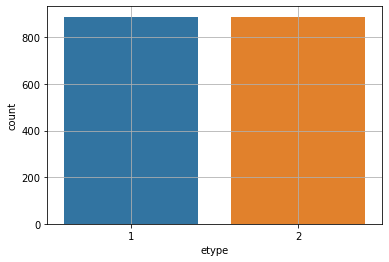

In [7]:
sns.countplot(df.etype)
plt.grid()
plt.show()

**Question 7: Drop the dependent variable from the Data Set and store it seperately. Then split your data into train and test data sets. The test data size should be 30% of the total data. Use random_state=7.**

In [8]:
X = df.drop('etype',axis=1)
Y = df.etype
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

**Question 8: Formulate a logistic regression model on the train data.**

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

**Question 9: Get the Model Score.**

In [10]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5684803001876173


**Question 10: Generate the Confusion Matrix and Classification Report. What are your observations and recommendations?**

In [11]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[143 115]
 [115 160]] 

Classification Report 
               precision    recall  f1-score   support

           1       0.55      0.55      0.55       258
           2       0.58      0.58      0.58       275

    accuracy                           0.57       533
   macro avg       0.57      0.57      0.57       533
weighted avg       0.57      0.57      0.57       533



## Try other techniques like CART RF ANN to improve upon accuracy and play around the model tuning techniques